In [1]:
#import libraries
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.patches as mpatches
style.use('ggplot')
import scipy.stats as stats
from scipy.stats import linregress,sem,ttest_ind

In [2]:
# initialize list of years to process
yrs_to_process=[1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,
                 2014,2015,2016,2017]

#list to hold marvel monthly count for a year
# marvel_mntly_top_thirty = []
#list to hold DC monthly count for a year
# dc_mntly_top_ten = []

#attributes /column names needed to plot charts
publishers_attributes = ["Marvel_Top_Thirty","DC_Top_Thirty",'Others_Top_Thirty','Marvel_Total_Sold',
                         'DC_Total_Sold','Others_Sold','Total_Sold','Total_Sales','Marvel_Total_Sales','DC_Total_Sales',
                         "Other_Total_Sales",'Marvel_price_avg','DC_price_avg','Others_price_avg'
                         ]

#create publishers stats dataframe with years as the index and attributes as columns
publishers_stats_df = pd.DataFrame(index=yrs_to_process ,columns=publishers_attributes)
# df_publishers_total_sold = pd.DataFrame(index=yrs_to_process ,columns="Marvel","DC",'Others')
#initialize all columns to zero
publishers_stats_df = publishers_stats_df.fillna(value=0)



# through all years initialized in dataframe
for index,row in publishers_stats_df.iterrows():
    #list to hold marvel monthly count for a year
    #reset marvel and DC monthly top 10 stats list when processing every year
    marvel_mntly_top_thirty = []
    dc_mntly_top_thirty = []

    
    #process each monthly json file for the year being processed
    for comichron_json in glob.glob("./source-data/" + str(index) + "-*.json"):
        if os.path.isfile(comichron_json):
            print(f"Processing file {comichron_json}")
            #read json file
            monthly_df = pd.read_json(comichron_json)
            
            monthly_df["Year"] = index
            monthly_df["fileName"] = comichron_json
            
            #sum monthly count of comic books sold and add it to running total in publishers stats dataframe
            row['Total_Sold'] = row['Total_Sold'] + monthly_df["count"].sum()
            #sum monthly count of comic books for Marvel sold and add it to running total in publishers stats dataframe
            row['Marvel_Total_Sold'] += monthly_df[monthly_df["publisher"] == 'Marvel']["count"].sum()
            #sum monthly count of comic books for DC sold and add it to running total in publishers stats dataframe
            row['DC_Total_Sold'] += monthly_df[monthly_df["publisher"] == 'DC']["count"].sum()
            
            #sort and get top thirty comics sold
            monthly_top_30 = monthly_df.sort_values(by = "count" ,ascending=False ).head(30)
            #count how many times marvel occur in top 30
            marvel_mntly_top_thirty.append(len(monthly_top_30[monthly_top_30["publisher"] == 'Marvel']))
            #count how many times DC occur in top 30
            dc_mntly_top_thirty.append(len(monthly_top_30[monthly_top_30["publisher"] == 'DC']))
            

            monthly_df["fprice"] = monthly_df["price"].str.replace("$","")
            monthly_df["fprice"] = pd.to_numeric(monthly_df["fprice"])
            monthly_df["fcount"] = monthly_df["count"].astype(float)
            monthly_df["sales"] = monthly_df.fprice * monthly_df.fcount 
            row['Total_Sales'] += monthly_df["sales"].sum()
            row['Marvel_Total_Sales'] += monthly_df[monthly_df["publisher"] == 'Marvel']["sales"].sum()
            row['DC_Total_Sales'] += monthly_df[monthly_df["publisher"] == 'DC']["sales"].sum()
            
            
    
    #calculate average for the year
    row["Marvel_Top_Thirty"] = np.mean(marvel_mntly_top_thirty)
    row["DC_Top_Thirty"] = np.mean(dc_mntly_top_thirty)
    row["Others_Top_Thirty"] = 30 - (row["Marvel_Top_Thirty"] + row["DC_Top_Thirty"])
    row["Others_Sold"] = row['Total_Sold'] - (row["Marvel_Total_Sold"] + row["DC_Total_Sold"])
    row["Other_Total_Sales"] = row['Total_Sales'] - (row["Marvel_Total_Sales"] + row["DC_Total_Sales"])
    row['Marvel_price_avg'] = row['Marvel_Total_Sales']/row["Marvel_Total_Sold"]
    row['DC_price_avg'] = row['DC_Total_Sales']/row["DC_Total_Sold"]
    row['Others_price_avg'] = row["Other_Total_Sales"] /row["Others_Sold"]




Processing file ./source-data/1997-03.json
Processing file ./source-data/1997-02.json
Processing file ./source-data/1997-05.json
Processing file ./source-data/1997-09.json
Processing file ./source-data/1997-08.json
Processing file ./source-data/1997-12.json
Processing file ./source-data/1997-04.json
Processing file ./source-data/1997-11.json
Processing file ./source-data/1997-07.json
Processing file ./source-data/1997-06.json
Processing file ./source-data/1997-10.json
Processing file ./source-data/1997-01.json
Processing file ./source-data/1998-06.json
Processing file ./source-data/1998-10.json
Processing file ./source-data/1998-11.json
Processing file ./source-data/1998-07.json
Processing file ./source-data/1998-01.json
Processing file ./source-data/1998-02.json
Processing file ./source-data/1998-03.json
Processing file ./source-data/1998-12.json
Processing file ./source-data/1998-04.json
Processing file ./source-data/1998-08.json
Processing file ./source-data/1998-09.json
Processing 

Processing file ./source-data/2014-06.json
Processing file ./source-data/2014-07.json
Processing file ./source-data/2014-11.json
Processing file ./source-data/2014-01.json
Processing file ./source-data/2014-02.json
Processing file ./source-data/2014-03.json
Processing file ./source-data/2014-08.json
Processing file ./source-data/2014-04.json
Processing file ./source-data/2014-12.json
Processing file ./source-data/2014-05.json
Processing file ./source-data/2014-09.json
Processing file ./source-data/2015-07.json
Processing file ./source-data/2015-11.json
Processing file ./source-data/2015-10.json
Processing file ./source-data/2015-06.json
Processing file ./source-data/2015-01.json
Processing file ./source-data/2015-03.json
Processing file ./source-data/2015-02.json
Processing file ./source-data/2015-09.json
Processing file ./source-data/2015-05.json
Processing file ./source-data/2015-04.json
Processing file ./source-data/2015-12.json
Processing file ./source-data/2015-08.json
Processing 

In [3]:
publishers_stats_df

,Marvel_Top_Thirty,DC_Top_Thirty,Others_Top_Thirty,Marvel_Total_Sold,DC_Total_Sold,Others_Sold,Total_Sold,Total_Sales,Marvel_Total_Sales,DC_Total_Sales,Other_Total_Sales,Marvel_price_avg,DC_price_avg,Others_price_avg
1997,18,4,8,34985441,28097651,33071616,96154708,229329512,74709478,64723002,89897032,2,2,2
1998,18,4,8,28811621,24753072,27805920,81370613,198444858,64461676,58609535,75373647,2,2,2
1999,19,6,5,25793551,25802128,21937626,73533305,185049235,59255912,64727603,61065720,2,2,2
2000,19,6,5,22457597,23905108,19968706,66331411,178946963,56938441,63869228,58139294,2,2,2
2001,20,6,4,26143410,21102509,17066680,64312599,175166833,68032349,55841614,51292870,2,2,3
2002,20,6,4,31473401,20685102,18678658,70837161,188538204,77901647,54980266,55656291,2,2,2
2003,21,5,4,31323386,22750790,17065216,71139392,199084083,83769334,61866289,53448460,2,2,3
2004,21,8,1,35234972,25379713,12119214,72733899,206431384,96726853,70664594,39039937,2,2,3
2005,19,10,1,34821847,28910833,10276049,74008729,213112603,99492687,79953045,33666871,2,2,3
2006,17,12,1,36328753,32188030,10355892,78872675,239952390,110715874,95271994,33964522,3,2,3


In [4]:
#name index to year ,reset index and display calculated stats
dfs = np.split(publishers_stats_df, [3], axis=1)
top_30_publishers_stats_df = dfs[0]
top_30_publishers_stats_df = top_30_publishers_stats_df.reset_index()
top_30_publishers_stats_df = top_30_publishers_stats_df.rename(columns={'index': 'Year', 
                                                                        'Marvel_Top_Thirty': 'Marvel',
                                                                        'DC_Top_Thirty': 'DC',
                                                                        'Others_Top_Thirty': 'Others'  })
total_sold_publishers_stats_df = dfs[1]
total_sold_publishers_stats_df = total_sold_publishers_stats_df.reset_index()
total_sold_publishers_stats_df = total_sold_publishers_stats_df.rename(columns={'index': 'Year', 
                                                                        'Marvel_Total_Sold': 'Marvel',
                                                                        'DC_Total_Sold': 'DC',
                                                                        'Others_Sold': 'Others',       
                                                                        'Total_Sold': 'Total'  })
total_sold_publishers_stats_df 
dfs = np.split(dfs[1], [4], axis=1)
total_sales_publishers_stats_df = dfs[1]
total_sales_publishers_stats_df = total_sales_publishers_stats_df.reset_index()
total_sales_publishers_stats_df = total_sales_publishers_stats_df.rename(columns={'index': 'Year', 
                                                                        'Total_Sales': 'Total',
                                                                        'DC_Total_Sales': 'DC',
                                                                        'Marvel_Total_Sales': 'Marvel' , 
                                                                        'Other_Total_Sales': 'Others'})
total_sales_publishers_stats_df

,Year,Total,Marvel,DC,Others,Marvel_price_avg,DC_price_avg,Others_price_avg
0,1997,229329512,74709478,64723002,89897032,2,2,2
1,1998,198444858,64461676,58609535,75373647,2,2,2
2,1999,185049235,59255912,64727603,61065720,2,2,2
3,2000,178946963,56938441,63869228,58139294,2,2,2
4,2001,175166833,68032349,55841614,51292870,2,2,3
5,2002,188538204,77901647,54980266,55656291,2,2,2
6,2003,199084083,83769334,61866289,53448460,2,2,3
7,2004,206431384,96726853,70664594,39039937,2,2,3
8,2005,213112603,99492687,79953045,33666871,2,2,3
9,2006,239952390,110715874,95271994,33964522,3,2,3


In [10]:
top_30_publishers_stats_df


,Year,Marvel,DC,Others
0,1997,18,4,8
1,1998,18,4,8
2,1999,19,6,5
3,2000,19,6,5
4,2001,20,6,4
5,2002,20,6,4
6,2003,21,5,4
7,2004,21,8,1
8,2005,19,10,1
9,2006,17,12,1


In [11]:
total_sold_publishers_stats_df

,Year,Marvel,DC,Others,Total,Total_Sales,Marvel_Total_Sales,DC_Total_Sales,Other_Total_Sales,Marvel_price_avg,DC_price_avg,Others_price_avg
0,1997,34985441,28097651,33071616,96154708,229329512,74709478,64723002,89897032,2,2,2
1,1998,28811621,24753072,27805920,81370613,198444858,64461676,58609535,75373647,2,2,2
2,1999,25793551,25802128,21937626,73533305,185049235,59255912,64727603,61065720,2,2,2
3,2000,22457597,23905108,19968706,66331411,178946963,56938441,63869228,58139294,2,2,2
4,2001,26143410,21102509,17066680,64312599,175166833,68032349,55841614,51292870,2,2,3
5,2002,31473401,20685102,18678658,70837161,188538204,77901647,54980266,55656291,2,2,2
6,2003,31323386,22750790,17065216,71139392,199084083,83769334,61866289,53448460,2,2,3
7,2004,35234972,25379713,12119214,72733899,206431384,96726853,70664594,39039937,2,2,3
8,2005,34821847,28910833,10276049,74008729,213112603,99492687,79953045,33666871,2,2,3
9,2006,36328753,32188030,10355892,78872675,239952390,110715874,95271994,33964522,3,2,3


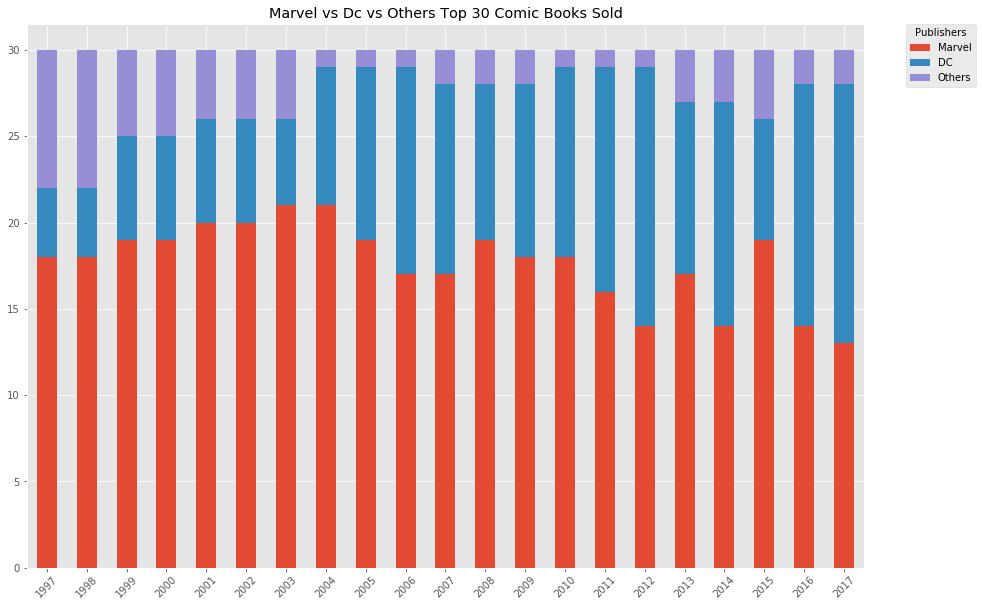

In [5]:
ax = top_30_publishers_stats_df[["Marvel","DC","Others"]]\
                        .plot(kind='bar',figsize=(15, 10),stacked = True,\
                         title="Marvel vs Dc vs Others Top 30 Comic Books Sold")
ax.set_xticklabels(yrs_to_process,rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Publishers")
plt.show()

In [ ]:
# stats.ttest_ind(total_sold_publishers_stats_df["Total"], total_sold_publishers_stats_df["DC"], equal_var=False)

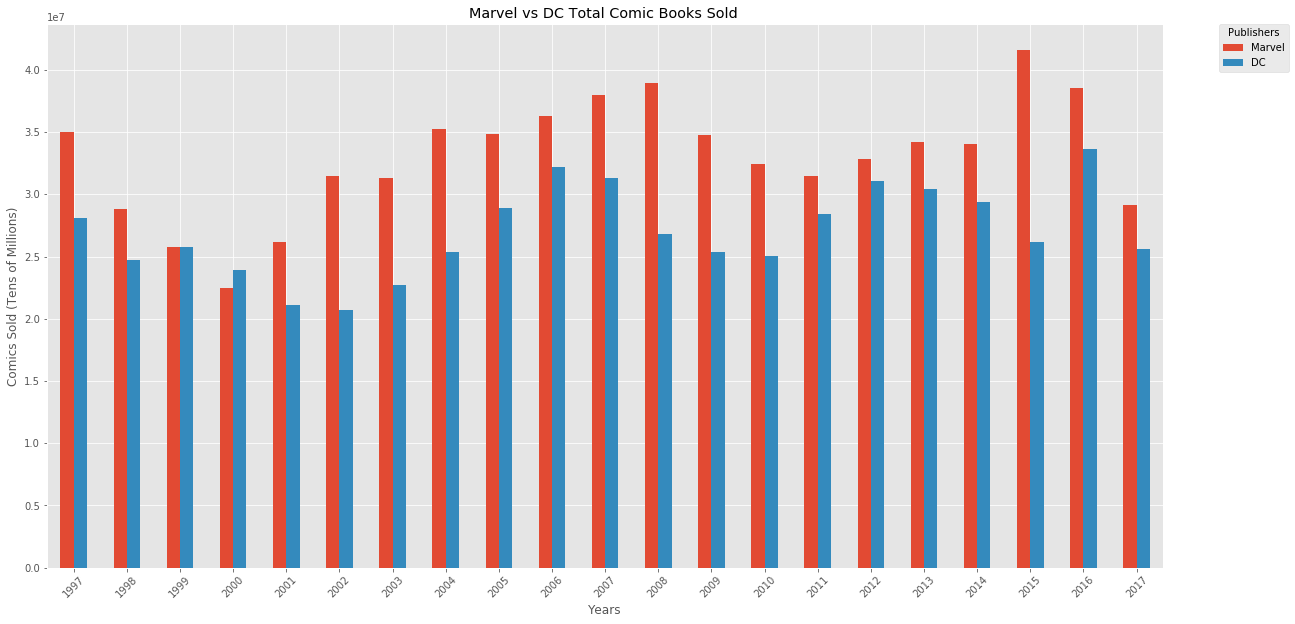

In [6]:
ax = total_sold_publishers_stats_df[["Marvel","DC"]].plot(kind='bar',figsize=(20, 10))
ax.set_xticklabels(yrs_to_process,rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Publishers")
# Set x and y limits
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.title("Marvel vs DC Total Comic Books Sold ")
plt.xlabel("Years")
plt.ylabel("Comics Sold (Tens of Millions)")
plt.show()


In [7]:
(t_stat_marvel,p_marvel) = ttest_ind(total_sold_publishers_stats_df["Total"],
                                     total_sold_publishers_stats_df["Marvel"], equal_var=False)
(t_stat_dc,p_dc) = ttest_ind(total_sold_publishers_stats_df["Total"],
                                 total_sold_publishers_stats_df["DC"], equal_var=False)
(t_stat_others,p_others) = ttest_ind(total_sold_publishers_stats_df["Total"],
                                 total_sold_publishers_stats_df["Others"], equal_var=False)

In [8]:
if p_marvel < 0.05:
    print("The difference in sample means is significant for Marvel.")
else:
    print("The difference in sample means is not significant for Marvel.")

The difference in sample means is significant for Marvel.


In [9]:
if p_dc < 0.05:
    print("The difference in sample means is significant for DC.")
else:
    print("The difference in sample means is not significant for Marvel.")

The difference in sample means is significant for DC.


In [10]:
tick_labels = ["Total","Marvel","DC","Others"]
means = [total_sold_publishers_stats_df["Total"].mean(),total_sold_publishers_stats_df["Marvel"].mean(),
         total_sold_publishers_stats_df["DC"].mean(),total_sold_publishers_stats_df["Others"].mean()]
x_axis = np.arange(0,len(means),1)
means

[77213434.33333333, 33013084.904761903, 26998667.19047619, 17201682.23809524]

In [11]:
sem = [sem(total_sold_publishers_stats_df["Total"]),
        sem(total_sold_publishers_stats_df["Marvel"]),
        sem(total_sold_publishers_stats_df["DC"]),
       sem(total_sold_publishers_stats_df["Others"])]
sem


[1884209.8971963006,
 1027982.2093139827,
 773820.44312752807,
 1324155.9266605165]

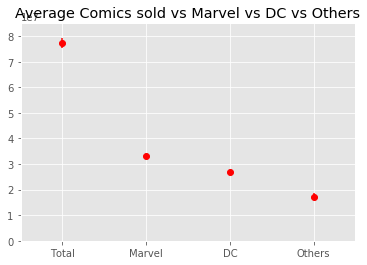

In [12]:
plt.errorbar(x_axis,means,sem,fmt="o",color='red')
plt.title("Average Comics sold vs Marvel vs DC vs Others")
plt.xlim(-0.5,3.5)
plt.ylim(0,85000000)
plt.xticks(x_axis,tick_labels)
plt.figure(figsize=(20,10))
plt.show()

In [13]:
# Labels for the sections of our pie chart
labels = ["Marvel", "DC", "Others"]

# The values of each section of the pie chart
sizes = []
sizes.append(publishers_stats_df["Marvel_Total_Sales"].sum())
sizes.append(publishers_stats_df["DC_Total_Sales"].sum())
sizes.append(publishers_stats_df["Other_Total_Sales"].sum())


# The colors of each section of the pie chart
# colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]

explode = (0.1, 0, 0)
sizes

[2240988994, 1727904061, 1178769583]

In [14]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1a1a3cbc50>,
  <matplotlib.text.Text at 0x1a1a3b3f98>])

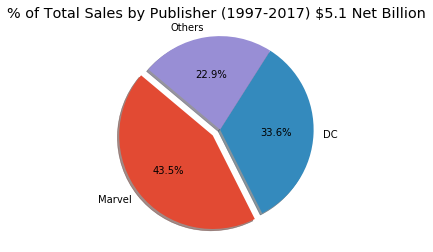

In [15]:
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("% of Total Sales by Publisher (1997-2017) $"
          + str(round(publishers_stats_df["Total_Sales"].sum()/1000000000,1)) + " Net Billion")
plt.show()

In [21]:
# stats.ttest_ind(publishers_stats_df["Marvel_Total_Sales"], publishers_stats_df["DC_Total_Sales"], equal_var=False)

In [16]:

(total_sold_marvel_slope, total_sold_marvel_int, _, _, _) = linregress(total_sales_publishers_stats_df["Year"],
                                                                total_sales_publishers_stats_df["Marvel"])
total_sold_marvel_fit = total_sold_marvel_slope * total_sales_publishers_stats_df["Year"] + total_sold_marvel_int

In [17]:
# Year = 2022
yrs_to_predict=[2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
marvel_sales_predict = []
for Year in yrs_to_predict:
    sales_predict = total_sold_marvel_slope * Year + total_sold_marvel_int
    print(f"The total comics sales prediction for Marvel in {Year} will be {sales_predict}.")
    marvel_sales_predict.append(sales_predict)

The total comics sales prediction for Marvel in 2018 will be 159140750.67618942.
The total comics sales prediction for Marvel in 2019 will be 163906840.59047508.
The total comics sales prediction for Marvel in 2020 will be 168672930.50476074.
The total comics sales prediction for Marvel in 2021 will be 173439020.4190464.
The total comics sales prediction for Marvel in 2022 will be 178205110.33333206.
The total comics sales prediction for Marvel in 2023 will be 182971200.24761772.
The total comics sales prediction for Marvel in 2024 will be 187737290.16190338.
The total comics sales prediction for Marvel in 2025 will be 192503380.07618904.
The total comics sales prediction for Marvel in 2026 will be 197269469.9904747.
The total comics sales prediction for Marvel in 2027 will be 202035559.90476036.
The total comics sales prediction for Marvel in 2028 will be 206801649.81904602.
The total comics sales prediction for Marvel in 2029 will be 211567739.73333168.
The total comics sales predict

In [18]:
(dc_sales_slope, dc_sales_int, _, _, _) = linregress(total_sales_publishers_stats_df["Year"], total_sales_publishers_stats_df["DC"])
dc_sales_fit = dc_sales_slope * total_sales_publishers_stats_df["Year"] + dc_sales_int

In [19]:
# Year = 2022
yrs_to_predict=[2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
dc_sales_predict = []
for Year in yrs_to_predict:
    sales_predict = dc_sales_slope * Year + dc_sales_int
    print(f"The total comics sales prediction for DC in {Year} will be {sales_predict}.")
    dc_sales_predict.append(sales_predict)

The total comics sales prediction for DC in 2018 will be 111316469.83333397.
The total comics sales prediction for DC in 2019 will be 113956044.74891853.
The total comics sales prediction for DC in 2020 will be 116595619.66450214.
The total comics sales prediction for DC in 2021 will be 119235194.58008671.
The total comics sales prediction for DC in 2022 will be 121874769.49567127.
The total comics sales prediction for DC in 2023 will be 124514344.41125584.
The total comics sales prediction for DC in 2024 will be 127153919.3268404.
The total comics sales prediction for DC in 2025 will be 129793494.24242496.
The total comics sales prediction for DC in 2026 will be 132433069.15800858.
The total comics sales prediction for DC in 2027 will be 135072644.07359314.
The total comics sales prediction for DC in 2028 will be 137712218.9891777.
The total comics sales prediction for DC in 2029 will be 140351793.90476227.
The total comics sales prediction for DC in 2030 will be 142991368.82034683.


In [20]:
sales_predictions_df = pd.DataFrame({
    "Year":yrs_to_predict,
    "Marvel":marvel_sales_predict,
    "DC":dc_sales_predict
    
})
sales_predictions_df

,DC,Marvel,Year
0,1.113165e+08,1.591408e+08,2018
1,1.139560e+08,1.639068e+08,2019
2,1.165956e+08,1.686729e+08,2020
3,1.192352e+08,1.734390e+08,2021
4,1.218748e+08,1.782051e+08,2022
5,1.245143e+08,1.829712e+08,2023
6,1.271539e+08,1.877373e+08,2024
7,1.297935e+08,1.925034e+08,2025
8,1.324331e+08,1.972695e+08,2026
9,1.350726e+08,2.020356e+08,2027


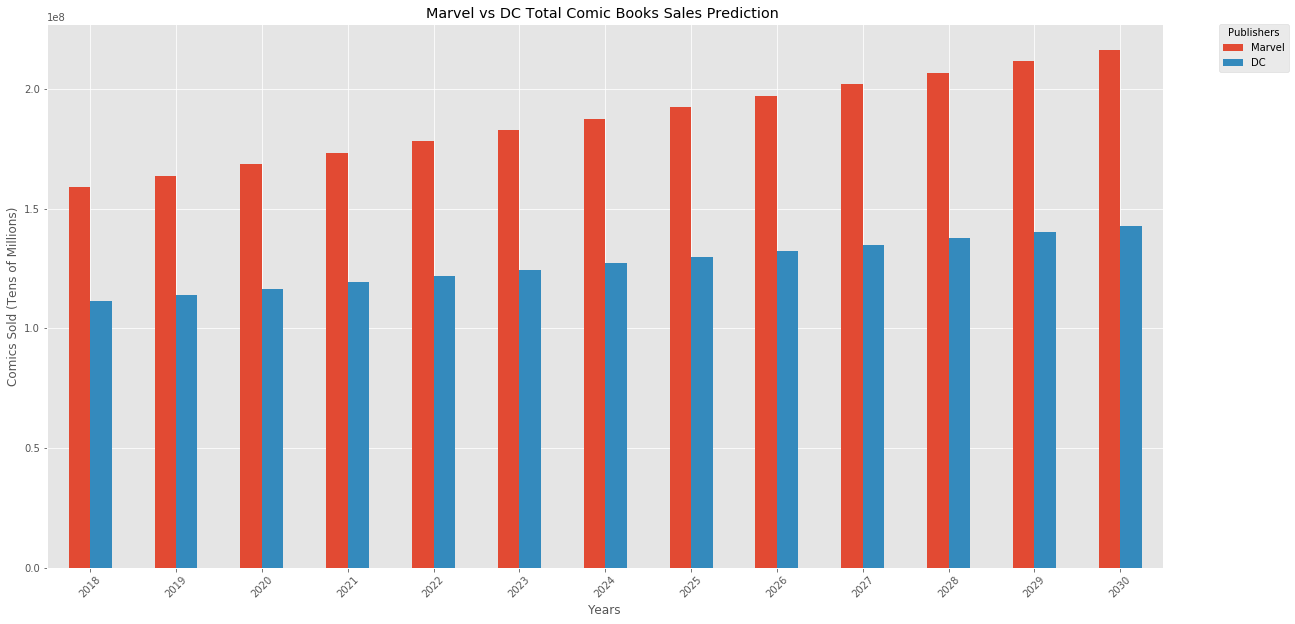

In [26]:
ax = sales_predictions_df[["Marvel","DC"]].plot(kind='bar',figsize=(20, 10))
ax.set_xticklabels(yrs_to_predict,rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Publishers")
# Set x and y limits
# plt.xlim(-0.25, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.title("Marvel vs DC Total Comic Books Sales Prediction ")
plt.xlabel("Years")
plt.ylabel("Comics Sold (Tens of Millions)")
plt.show()